# <center> <b> LECTURE 10 Out-of-sample Model Evaluation and Underfit/Orverfit
<span style="color: #f2cf4a; font-family: Babas; font-size: 2.1em;"> Content

    1. Train/Test split
    2. Underfit/Overfit

In [117]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [119]:
import pandas as pd
import numpy as np
# viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as pe

In [120]:
%matplotlib inline

In [121]:
# Import cleaned data 
path = r'/Users/vietnd/Documents/Datapot/Course Materials/FTU/FDC104/Lecture 07/cleaned_data.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


#### Lets only use numeric data 

In [122]:
df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,27,13495.0,11.190476,8.703704,0,1,1,0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,27,16500.0,11.190476,8.703704,0,1,1,0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,...,5000.0,19,26,16500.0,12.368421,9.038462,0,1,1,0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,...,5500.0,24,30,13950.0,9.791667,7.833333,0,1,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,...,5500.0,18,22,17450.0,13.055556,10.681818,0,1,1,0


# 1. Training set & Testing set

#### Question is we want the model not only work well on seen dataset but also on unseen data. But how we get unseen data when we only have historical data in hand ?

## 1.1. Randomly split by ratio
An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y_data</b>.</p>

<b>Syntax:</b>```train_test_split(X, y, test_size=)```

In [123]:
y_data = df['price']

In [124]:
x_data = df.drop('price',axis=1)

#### Now we randomly split our data into training and testing data  using the function <b>train_test_split

In [125]:
from sklearn.model_selection import train_test_split

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=15)

lr = LinearRegression()
lr.fit(x_train[['horsepower']], y_train)
print(f"R2 score of training set: {r2_score(y_train, lr.predict(x_train[['horsepower']]))}")
print(f"R2 score of testing set: {r2_score(y_test, lr.predict(x_test[['horsepower']]))}")

R2 score of training set: 0.6554253225900075
R2 score of testing set: 0.5766080958811275


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is set to 10% of the total dataset. 


Let's import <b>LinearRegression</b> from the module <b>linear_model</b>.


In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score≠

In [128]:
lr = LinearRegression()

#### Build a the model using the feature "horsepower" 

In [131]:
lr.fit(x_train[['horsepower']], y_train)

LinearRegression()

#### Calculate the R^2 on the train set and test set

In [132]:
print(f"R2 score of training set: {r2_score(y_train, lr.predict(x_train[['horsepower']]))}")
print(f"R2 score of testing set: {r2_score(y_test, lr.predict(x_test[['horsepower']]))}")

R2 score of training set: 0.662028747521533
R2 score of testing set: 0.3635480624962413


### Problem ???

<div class="alert alert-info" style="margin-top: 20px">
    <h1> Exercise </h1>
    <b>Use the function "train_test_split" to split up the data set such that 40% of the data samples will be utilized for testing, set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train_1" , "x_test_1", "y_train_1" and  "y_test_1".</b>
</div>

In [ ]:
# Start here


<div class="alert alert-info" style="margin-top: 20px">
    <h1> Exercise </h1>
    <b> Build a the model using the feature "horsepower". After that, find the R^2  on the new train/test set </b>
</div>

In [ ]:
# Start here


## 1.2. Cross validation

### What is cross validation ? 

- <b>Cross-validation</b> sometimes called <b>out-of-sample testing</b>, is a model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. 
- The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

### How does cross validation work ?
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500" height="600"></img>

docs: https://scikit-learn.org/stable/modules/cross_validation.html

In scikit-learn library, there are plenty of cross-validation ways to split dataset:
- ```KFold()```: split into k folds
- ```ShuffleSplit()```: shuffle each iteration and then split
- ```StratifiedKFold()```: split into k folds but each set keep same percentage of samples of each target class as the complete set.
- ...

Or you can use ```cross_val_score``` to automatically split and calculate metric score in one call.

### 1.2.1 KFold
<b>Syntax:</b>
- ```KFold(n_splits=5, *, shuffle=False, random_state=None) to create KFold iterator```
- ```KFold.split(X, y=None, groups=None) to split data```

In [135]:
from sklearn.model_selection import KFold, cross_val_score

In [136]:
x_data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,111,5000.0,21,27,11.190476,8.703704,0,1,1,0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,111,5000.0,21,27,11.190476,8.703704,0,1,1,0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,...,154,5000.0,19,26,12.368421,9.038462,0,1,1,0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,...,102,5500.0,24,30,9.791667,7.833333,0,1,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,...,115,5500.0,18,22,13.055556,10.681818,0,1,1,0


In [137]:
y_data.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

#### Split data using k-folds cross validation and build model in each iteration

- create KFold
- split data in for loop
- build model and calculate metric in each iteration

In [138]:
kf = KFold(n_splits=5)

In [139]:
lr_kfold = LinearRegression()

In [140]:
x_data_hp = x_data[['horsepower']]

In [141]:
for train_index, test_index in kf.split(x_data_hp):  # split; it returns list of indexes
    X_train, X_test = x_data_hp.iloc[train_index], x_data_hp.iloc[test_index]
    Y_train, Y_test = y_data[train_index], y_data[test_index]

    # fit model
    lr_kfold.fit(X_train, Y_train)
    # evaluate
    Y_hat_train = lr_kfold.predict(X_train)
    Y_hat_test = lr_kfold.predict(X_test)
    
    print(f"R2 score on train set = {r2_score(Y_train, Y_hat_train)} --- test set = {r2_score(Y_test, Y_hat_test)}")

R2 score on train set = 0.6258349250721615 --- test set = 0.7377280134396421
R2 score on train set = 0.6704949552219102 --- test set = 0.5599127291834456
R2 score on train set = 0.6912537603792946 --- test set = -0.08063239450773807
R2 score on train set = 0.6024600228665753 --- test set = 0.8774718737358697
R2 score on train set = 0.6989785960416537 --- test set = -0.16254115968460026


#### Another way to calculate cross-validation metric using cross_val_score
<b>Syntax:</b> ```cross_val_score(estimator, X, y, cv, scoring)```

In [144]:
r2_cv = cross_val_score(lr_kfold, x_data_hp, y_data, cv=5, scoring='r2')
r2_cv

array([ 0.73772801,  0.55991273, -0.08063239,  0.87747187, -0.16254116])

 We can calculate the average and standard deviation of our estimate:


In [145]:
print(f"The mean of the folds = {r2_cv.mean():.3f} +- {r2_cv.std():.3f}")

The mean of the folds = 0.386 +- 0.428


<div class="alert alert-info" style="margin-top: 20px">
    <h1> Exercise</h1>
    <b> Calculate the average R^2 using two folds </b>
</div>

In [147]:
lr_kfold = LinearRegression()
r2_cv = cross_val_score(lr_kfold, x_data_hp, y_data, cv=2, scoring='r2')
r2_cv.mean()

0.516835099979672

# 2. Overfitting, Underfitting and Model Selection

<p>It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world.  One reason for this is overfitting.
    
<p>Let's go over some examples. In Linear Regression and Polynomial Regression, these differences are more apparent so we will explore overfitting in that context.</p>

## 2.1. Linear Regression

#### Split data into train/test set

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)

#### Let's create Multiple linear regression objects and train the model using ['symboling', 'normalized-losses', 'wheel-base'] as features.

In [149]:
lr = LinearRegression()
lr.fit(x_train[['symboling', 'normalized-losses', 'wheel-base']], y_train)

LinearRegression()

#### Calculate R^2 score on train and test set

In [150]:
y_hat_train = lr.predict(x_train[['symboling', 'normalized-losses', 'wheel-base']])
print("R2 on training set", r2_score(y_train, y_hat_train))

R2 on training set 0.4124421616975885


In [151]:
y_hat_test = lr.predict(x_test[['symboling', 'normalized-losses', 'wheel-base']])
print("R2 on testing set", r2_score(y_test, y_hat_test))

R2 on testing set 0.3092611531395243


#### Let's examine the distribution of the predicted values of the training/testing data

In [152]:
def distribution_plot(ax, x_value, y_value, x_label, y_label, title):
    """
    Params:
     :x_value(array): 
     :y_value(array):
     :x_label(str): 
     :y_label(str):
     :title(str):
    
    Returns
    """
    sns.kdeplot(x_value, color="r", label=x_label, ax=ax)
    sns.kdeplot(y_value, color="b", label=y_label, ax=ax)

    ax.set_title(title)
    ax.legend()

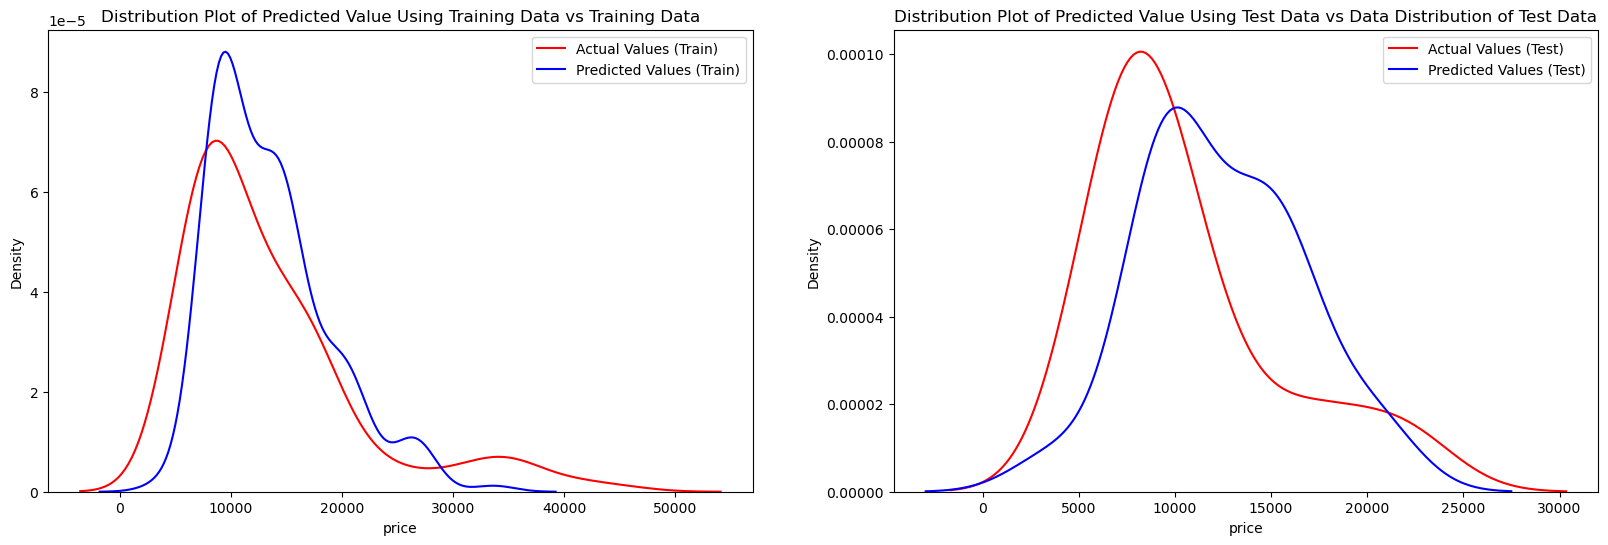

In [153]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
title1 = 'Distribution Plot of Predicted Value Using Training Data vs Training Data'
distribution_plot(axs[0], y_train, y_hat_train, "Actual Values (Train)", "Predicted Values (Train)", title1)

title2 = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
distribution_plot(axs[1], y_test, y_hat_test, "Actual Values (Test)","Predicted Values (Test)", title2)
plt.show()

<p>So far the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.</p>
<p>Comparing Figure 1 and Figure 2; it is evident the model learn pretty well but quitely bad in prediction on unseen data</p>

## 2.2. Polynomial Regression

<p>Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>

In [154]:
from sklearn.preprocessing import PolynomialFeatures

#### Let's use 55 percent of the data for training and the rest for testing:

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

#### We will perform a degree 5 polynomial transformation on the feature <b>'horse power'</b>.

In [166]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train[['horsepower']])
x_test_poly = poly.transform(x_test[['horsepower']])

#### Create a linear regression model and train it.

In [167]:
lr = LinearRegression()
lr.fit(x_train_poly, y_train)

LinearRegression()

#### Calcuate R^2 of the training data and testing data

In [168]:
print(lr.score(x_train_poly, y_train))
print(lr.score(x_test_poly, y_test))

0.5330836546936898
0.7405883774810659


We see the R^2 for the training data is 0.5568 while the R^2 on the test data was -29.82.  The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

#### Plot predicted line

In [220]:
def poly_plot_with_plt(x_train, x_test, y_train, y_test, lr, poly_transform):
    """
    Params:
     - x_train
     - x_test
     - y_train
     - y_test
     - lr: linear regression object 
     - poly_transform: polynomial transformation object 
    
    Returns:
    """
    plt.figure(figsize=(10, 6))
    
    xmax = max([x_train.values.max(), x_test.values.max()])
    xmin = min([x_train.values.min(), x_test.values.min()])
    x = np.arange(xmin, xmax, 0.1)
    x_poly = poly_transform.fit_transform(x.reshape(-1, 1))
    
    # scatter
    plt.plot(x_train, y_train, 'ro', label='Training Data')
    plt.plot(x_test, y_test, 'go', label='Test Data')
    # line
    plt.plot(x, lr.predict(x_poly), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.xlabel('Horsepower')
    plt.title('Polynomial Regression')
    plt.legend()

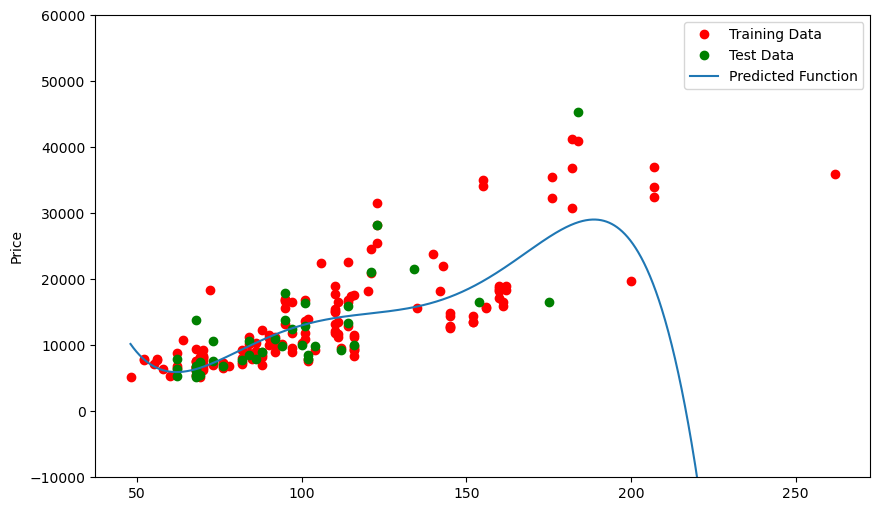

In [221]:
poly_plot(x_train[['horsepower']], x_test['horsepower'], y_train, y_test, lr, poly)
plt.show()

In [218]:
def poly_plot_with_plotly(x_train, x_test, y_train, y_test, lr, poly_transform):
    """
    Params:
     - x_train
     - x_test
     - y_train
     - y_test
     - lr: linear regression object 
     - poly_transform: polynomial transformation object 
    
    Returns:
    """
    xmax = max([x_train.values.max(), x_test.values.max()])
    xmin = min([x_train.values.min(), x_test.values.min()])
    x = np.arange(xmin, xmax, 0.1)
    x_poly = poly_transform.fit_transform(x.reshape(-1, 1))

    # scatter
    fig1 = go.Scatter(x=x_train, y=y_train, mode='markers', name='Training Data', marker=dict(color='red'))
    fig2 = go.Scatter(x=x_test, y=y_test, mode='markers', name='Testing Data', marker=dict(color='green'))

    # line
    fig3 = go.Scatter(x=x, y=lr.predict(x_poly), mode='lines', name='Predicted Line', line=dict(color='blue'))

    # combine
    fig = go.Figure(data=[fig1, fig2, fig3])
    fig
    fig.update_yaxes(range=[-10000, 60000])
    fig.update_layout(
        title='Polynomial Regression',
        xaxis=dict(title='Horsepower'),
        yaxis=dict(title='Price'),
        width=1200,
        height=700
    )
    fig.show()

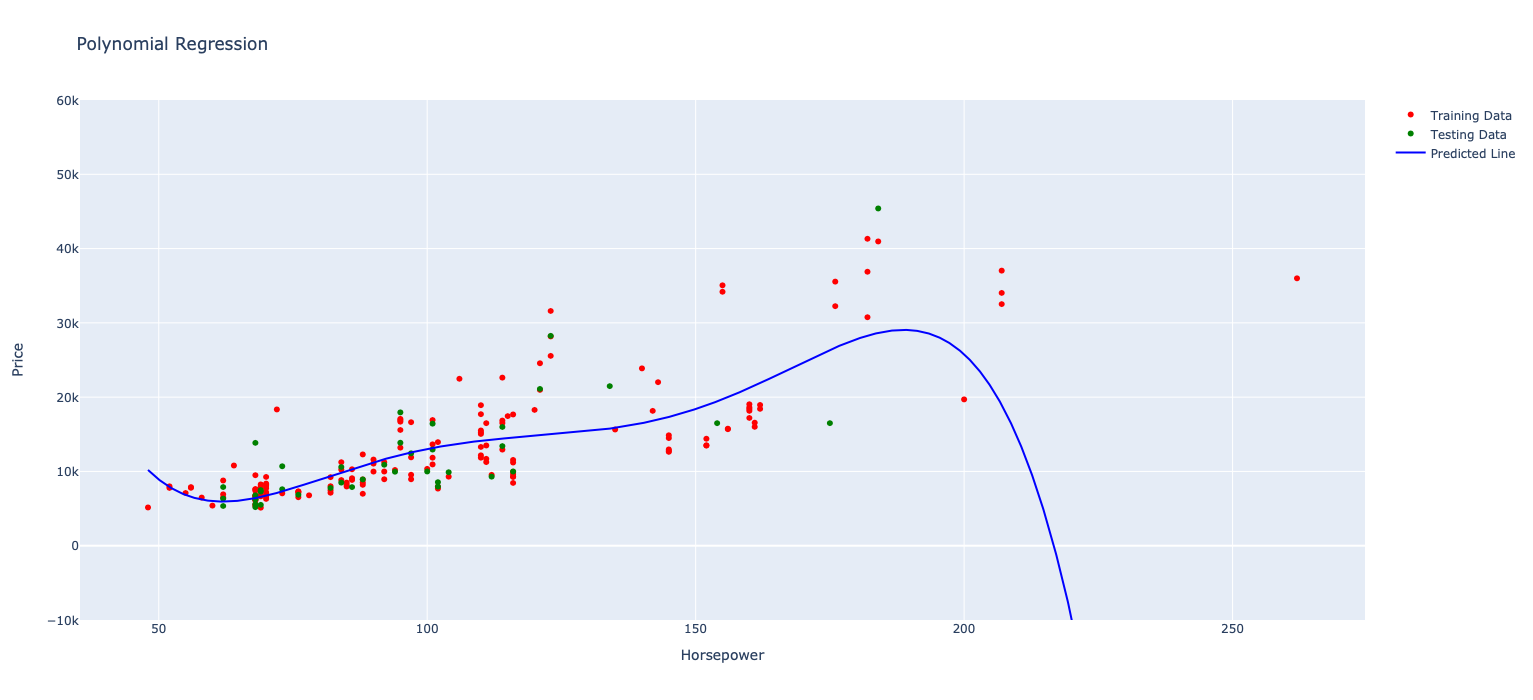

In [219]:
poly_plot_with_plotly(x_train['horsepower'], x_test['horsepower'], y_train, y_test, lr, poly)

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 


#### Let's see how the R^2 changes on the test data for different order polynomials and plot the results

In [171]:
r2_score_test = []
orders = [1, 2, 3, 4, 5]

for n in orders:
    poly = PolynomialFeatures(degree=n)
    x_train_poly = poly.fit_transform(x_train[['horsepower']])
    x_test_poly = poly.transform(x_test[['horsepower']])    
    lr.fit(x_train_poly, y_train)
    y_hat_test = lr.predict(x_test_poly)
    r2 = r2_score(y_test, y_hat_test)
    r2_score_test.append(r2)

In [172]:
print(r2_score_test)

[0.7325525599914199, 0.7405883774810659, 0.7406243560944796, 0.4044155858688605, -29.815556299616322]


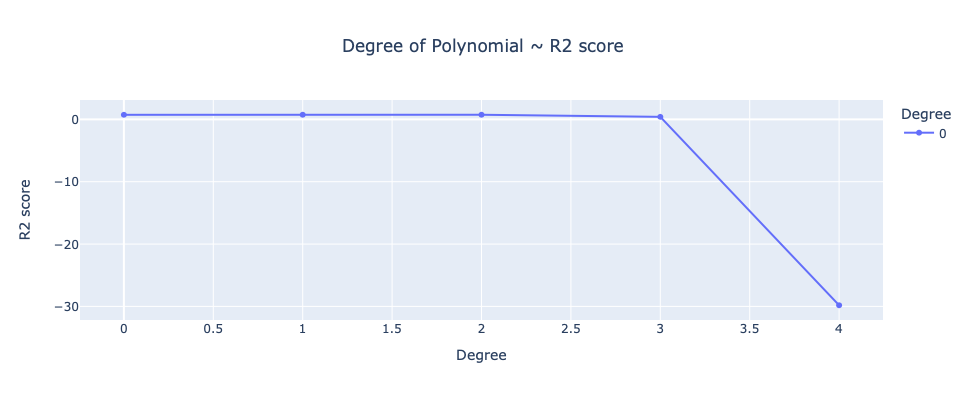

In [173]:
fig = ex.line(pd.Series(r2_score_test), title='Degree of Polynomial ~ R2 score', width=800, height=400, markers=True)
fig.update_layout(
    xaxis_title="Degree",
    yaxis_title="R2 score",
    legend_title="Degree",
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.show()

We see the $R^2$ gradually increases until an order three polynomial is used. Then the $R^2$ dramatically decreases at four.

#### Testing in variety of combination of order and number of testing data

In [176]:
def f(order, test_data_ratio):
    """
    Params:
     - orders (int): order of polynomial function
     - test_data_ratio (float):
    """
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data_ratio, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    poly_plot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)
    plt.title(f"Predicted line with order = {order} and test_ratio = {test_data_ratio}")

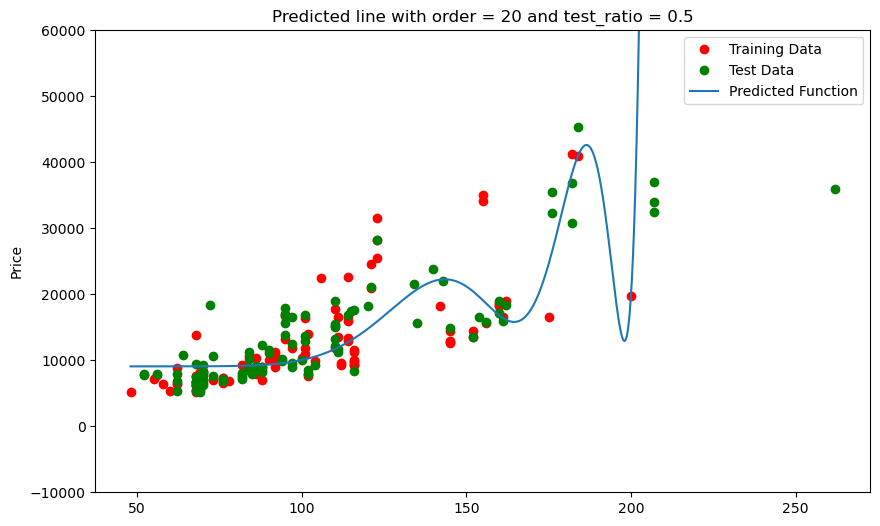

In [178]:
f(20, 0.5)

<div class="alert alert-info" style="margin-top: 20px">
    <h1> Exercise</h1>
    <b>We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two</b>
</div>

In [179]:
pr1 = PolynomialFeatures(degree=2)

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=15)

In [191]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data[['horsepower']])
split()

In [192]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=15)
scaler = StandardScaler()
scaler.fit(x_train[['horsepower']])
x_train_scaled = scaler.transform(x_train[['horsepower']])
x_test_scaled = scaler.transform(x_test[['horsepower']])

<div class="alert alert-info" style="margin-top: 20px">
    <h1> Exercise </h1>
    <b> Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-L/100km'</b>
</div>

In [186]:
x_train_4_feats = x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
x_test_4_feats = x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]

In [187]:
pr1.fit(x_train_4_feats)

PolynomialFeatures()

In [188]:
x_train_4_feats_pr = pr1.transform(x_train_4_feats)
x_test_4_feats_pr = pr1.transform(x_test_4_feats)

<!-- The answer is below:

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->


<div class="alert alert-info" style="margin-top: 20px">
    <h1> Exercise </h1>
    <b> How many dimensions does the new feature have ?</b>
</div>

In [193]:
x_train_4_feats_pr.shape

(160, 15)

<div class="alert alert-info" style="margin-top: 20px">
    <h1> Exercise </h1>
    <b> Create a linear regression model "poly1" and train the object using the polynomial features</b>
</div>

In [194]:
poly1 = LinearRegression()
poly1.fit(x_train_4_feats_pr, y_train)

LinearRegression()

<div class="alert alert-info" style="margin-top: 20px">
    <h1> Exercise </h1>
    <b>Use the method  "predict" to predict an output on the polynomial features, then use the function "distribution_plot" to display the distribution of the predicted output vs true output on test set?</b>
</div>

In [195]:
y_hat_train = poly1.predict(x_train_4_feats_pr)
y_hat_test = poly1.predict(x_test_4_feats_pr)

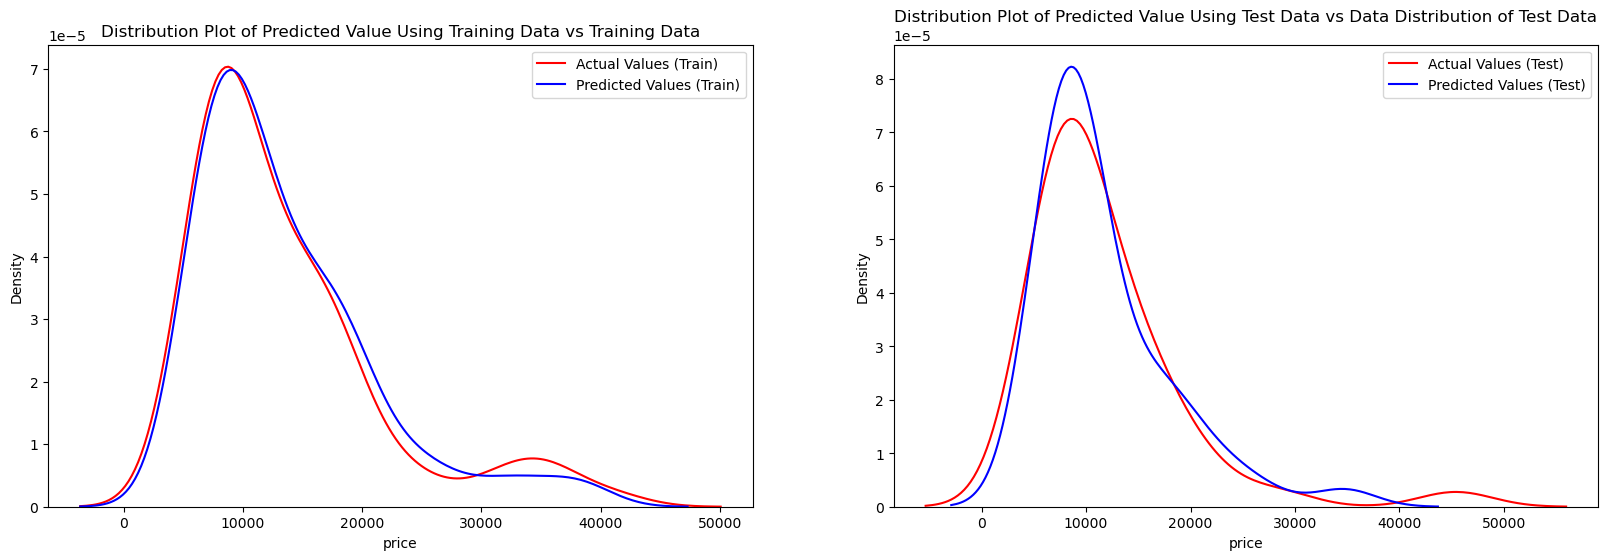

In [196]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
title1 = 'Distribution Plot of Predicted Value Using Training Data vs Training Data'
distribution_plot(axs[0], y_train, y_hat_train, "Actual Values (Train)", "Predicted Values (Train)", title1)

title2 = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
distribution_plot(axs[1], y_test, y_hat_test, "Actual Values (Test)","Predicted Values (Test)", title2)
plt.show()

# Wraps up
- out of samples validation
- underfit/orverfit